### Below: Pleiades Constellation data graphed
#### 1 degree box around the star cluster, possibly break up by parsec

SQL:
SELECT * 
from gaiadr2.gaia_source 
where 
RA between 56.35 and 57.35 AND
DEC between 23.65 and 24.65 AND
parallax > 0

In [4]:
#Functions for distance, x, y, and z
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

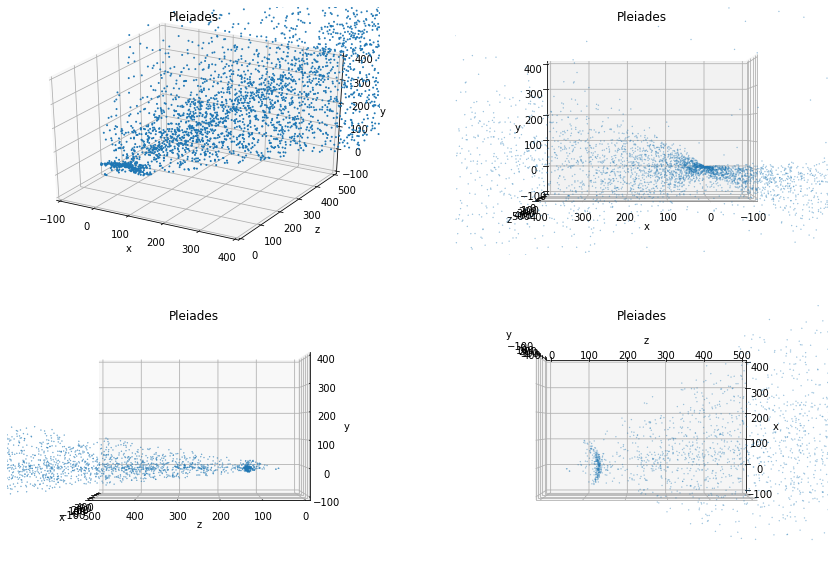

In [5]:
data_frame = pd.read_csv("pleiades.csv")
pleiades = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
pleiades.loc[:, 'parallax_arcsec'] = pleiades['parallax'].apply(lambda x: x*.001)
pleiades.loc[:, 'R'] = pleiades['parallax_arcsec'].apply(distance)
pleiades.loc[:, 'x'] = pleiades.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
pleiades.loc[:, 'y'] = pleiades.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
pleiades.loc[:, 'z'] = pleiades.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axp = fig.add_subplot(221, projection ='3d')
axp.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=1)
axp.set_xlim([-100, 400])
axp.set_ylim([0, 500])
axp.set_zlim([-100, 400])
axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('Pleiades')

axp1 = fig.add_subplot(222, projection ='3d')
axp1.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=0.1)
axp1.set_xlim([-100, 400])
axp1.set_ylim([0, 500])
axp1.set_zlim([-100, 400])
axp1.set_xlabel('x')
axp1.set_ylabel('z')
axp1.set_zlabel('y')
axp1.set_title('Pleiades')
axp1.view_init(0, 90)
plt.show

axp2 = fig.add_subplot(223, projection ='3d')
axp2.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=0.1)
axp2.set_xlim([-100, 400])
axp2.set_ylim([0, 500])
axp2.set_zlim([-100, 400])
axp2.set_xlabel('x')
axp2.set_ylabel('z')
axp2.set_zlabel('y')
axp2.set_title('Pleiades')
axp2.view_init(0, 180)
plt.show

axp3 = fig.add_subplot(224, projection ='3d')
axp3.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=0.1)
axp3.set_xlim([-100, 400])
axp3.set_ylim([0, 500])
axp3.set_zlim([-100, 400])
axp3.set_xlabel('x')
axp3.set_ylabel('z')
axp3.set_zlabel('y')
axp3.set_title('Pleiades')
axp3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

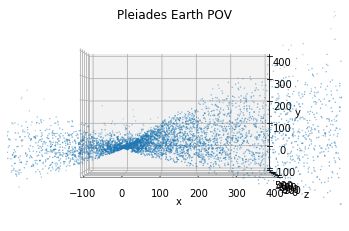

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=0.1)
ax.set_xlim([-100, 400])
ax.set_ylim([0, 500])
ax.set_zlim([-100, 400])
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Pleiades Earth POV')
ax.view_init(0, 270)
plt.show()

### Below: random 1 degree boxes to compare to the Pleiades cluster.

Analysis of the below graphs as well as Pleiades above:

They all look like star clusters when just the Pleiades is a cluster. This is due to outlier "stars" found outside the Milky Way. In order to fix this, I'm going to "zoom" into the part of the graph where each "cluster" (really just the Milky Way) is.

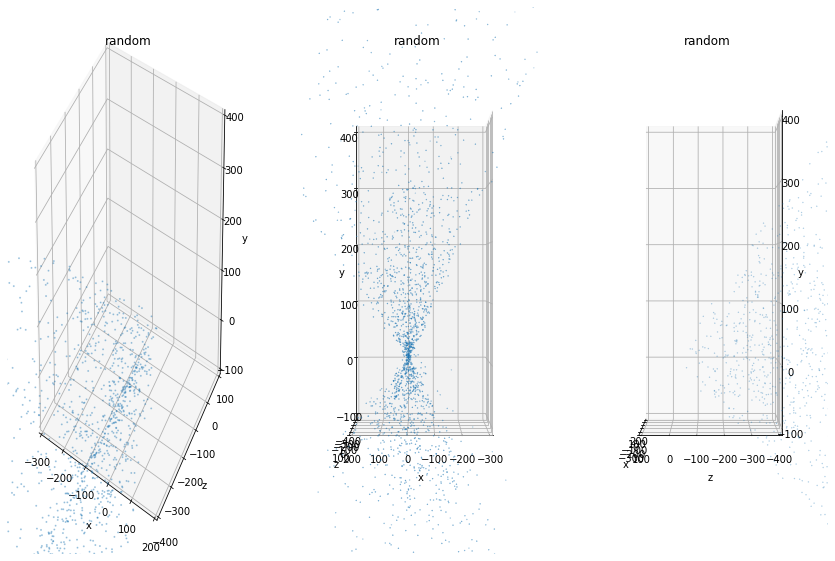

In [7]:
#RA between 6.35 and 7.35
#DEC between 3.65 and 4.65

data_frame = pd.read_csv("random.csv")
random = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
random.loc[:, 'parallax_arcsec'] = random['parallax'].apply(lambda x: x*.001)
random.loc[:, 'R'] = random['parallax_arcsec'].apply(distance)
random.loc[:, 'x'] = random.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
random.loc[:, 'y'] = random.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
random.loc[:, 'z'] = random.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axr = fig.add_subplot(131, projection ='3d')
axr.scatter(random['x'], random['z'], random['y'], s=1)
axr.set_xlim([-300, 200])
axr.set_ylim([-400, 100])
axr.set_zlim([-100, 400])
axr.set_xlabel('x')
axr.set_ylabel('z')
axr.set_zlabel('y')
axr.set_title('random')

axr1 = fig.add_subplot(132, projection ='3d')
axr1.scatter(random['x'], random['z'], random['y'], s=0.1)
axr1.set_xlim([-300, 200])
axr1.set_ylim([-400, 100])
axr1.set_zlim([-100, 400])
axr1.set_xlabel('x')
axr1.set_ylabel('z')
axr1.set_zlabel('y')
axr1.set_title('random')
axr1.view_init(0, 90)
plt.show

axr2 = fig.add_subplot(133, projection ='3d')
axr2.scatter(random['x'], random['z'], random['y'], s=0.1)
axr2.set_xlim([-300, 200])
axr2.set_ylim([-400, 100])
axr2.set_zlim([-100, 400])
axr2.set_xlabel('x')
axr2.set_ylabel('z')
axr2.set_zlabel('y')
axr2.set_title('random')
axr2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

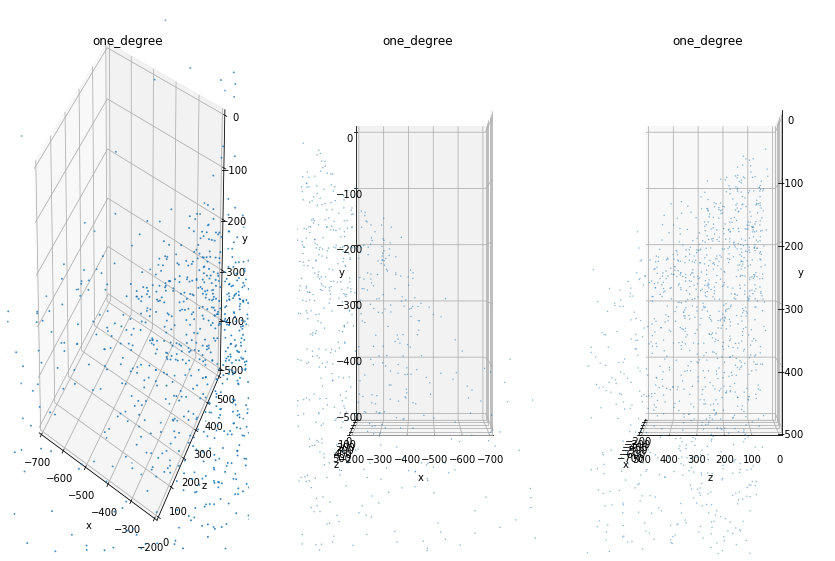

In [8]:
#RA between 10 and 11
#DEC between 0 and 1

data_frame = pd.read_csv("one-degree-box-old.csv")
one_degree = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
one_degree.loc[:, 'parallax_arcsec'] = one_degree['parallax'].apply(lambda x: x*.001)
one_degree.loc[:, 'R'] = one_degree['parallax_arcsec'].apply(distance)
one_degree.loc[:, 'x'] = one_degree.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
one_degree.loc[:, 'y'] = one_degree.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
one_degree.loc[:, 'z'] = one_degree.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axo = fig.add_subplot(131, projection ='3d')
axo.scatter(one_degree['x'], one_degree['z'], one_degree['y'], s=1)
axo.set_xlim([-700, -200])
axo.set_ylim([0, 500])
axo.set_zlim([-500, 0])
axo.set_xlabel('x')
axo.set_ylabel('z')
axo.set_zlabel('y')
axo.set_title('one_degree')

axo1 = fig.add_subplot(132, projection ='3d')
axo1.scatter(one_degree['x'], one_degree['z'], one_degree['y'], s=0.1)
axo1.set_xlim([-700, -200])
axo1.set_ylim([0, 500])
axo1.set_zlim([-500, 0])
axo1.set_xlabel('x')
axo1.set_ylabel('z')
axo1.set_zlabel('y')
axo1.set_title('one_degree')
axo1.view_init(0, 90)
plt.show

axo2 = fig.add_subplot(133, projection ='3d')
axo2.scatter(one_degree['x'], one_degree['z'], one_degree['y'], s=0.1)
axo2.set_xlim([-700, -200])
axo2.set_ylim([0, 500])
axo2.set_zlim([-500, 0])
axo2.set_xlabel('x')
axo2.set_ylabel('z')
axo2.set_zlabel('y')
axo2.set_title('one_degree')
axo2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


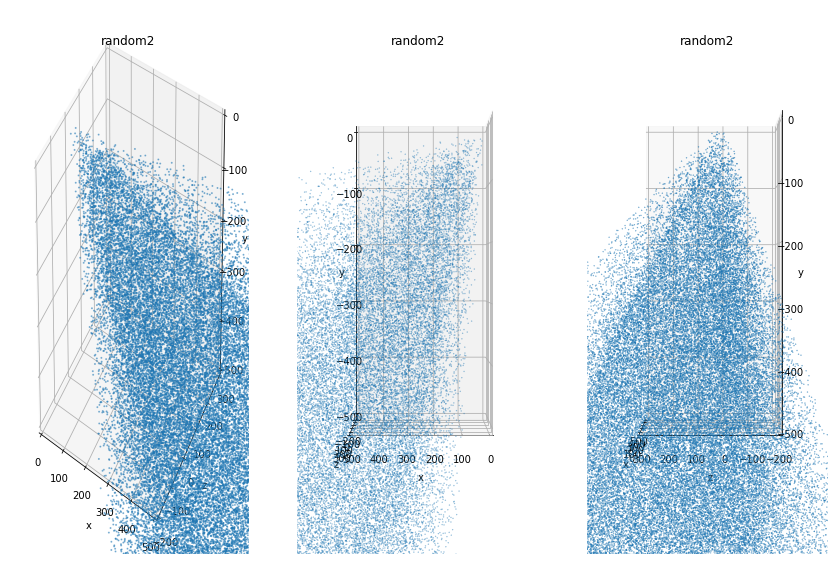

In [9]:
#RA between 277 and 278
#DEC between -32 and -31

data_frame = pd.read_csv("new.csv")
new= data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
new.loc[:, 'parallax_arcsec'] = new['parallax'].apply(lambda x: x*.001)
new.loc[:, 'R'] = new['parallax_arcsec'].apply(distance)
new.loc[:, 'x'] = new.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
new.loc[:, 'y'] = new.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
new.loc[:, 'z'] = new.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axn = fig.add_subplot(131, projection ='3d')
axn.scatter(new['x'], new['z'], new['y'], s=1)
axn.set_xlim([0, 500])
axn.set_ylim([-200, 300])
axn.set_zlim([-500, 0])
axn.set_xlabel('x')
axn.set_ylabel('z')
axn.set_zlabel('y')
axn.set_title('random2')

axn1 = fig.add_subplot(132, projection ='3d')
axn1.scatter(new['x'], new['z'], new['y'], s=0.1)
axn1.set_xlim([0, 500])
axn1.set_ylim([-200, 300])
axn1.set_zlim([-500, 0])
axn1.set_xlabel('x')
axn1.set_ylabel('z')
axn1.set_zlabel('y')
axn1.set_title('random2')
axn1.view_init(0, 90)
plt.show

axn2 = fig.add_subplot(133, projection ='3d')
axn2.scatter(new['x'], new['z'], new['y'], s=0.1)
axn2.set_xlim([0, 500])
axn2.set_ylim([-200, 300])
axn2.set_zlim([-500, 0])
axn2.set_xlabel('x')
axn2.set_ylabel('z')
axn2.set_zlabel('y')
axn2.set_title('random2')
axn2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

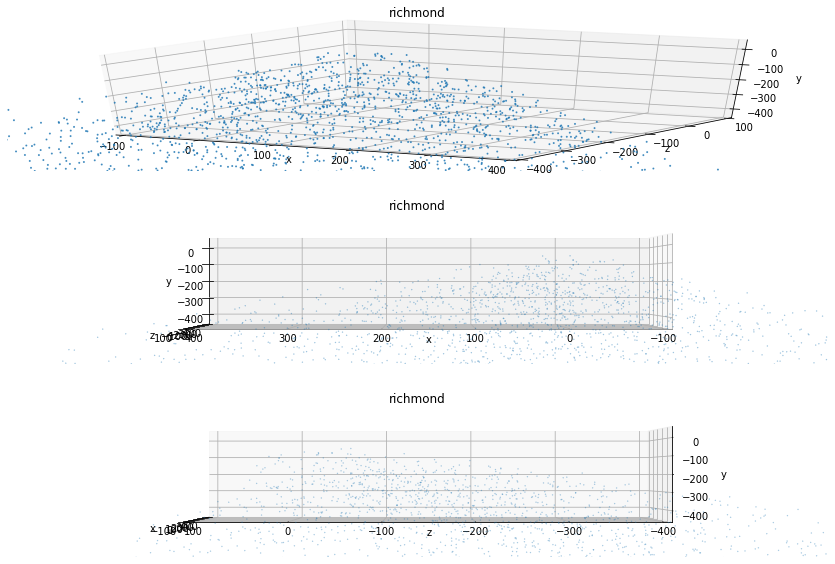

In [10]:
#Dr. Richmond's suggestion

#RA between
#DEC between 17.5 and 18.5

data_frame = pd.read_csv("richmond.csv")
richmond = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
richmond.loc[:, 'parallax_arcsec'] = richmond['parallax'].apply(lambda x: x*.001)
richmond.loc[:, 'R'] = richmond['parallax_arcsec'].apply(distance)
richmond.loc[:, 'x'] = richmond.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
richmond.loc[:, 'y'] = richmond.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
richmond.loc[:, 'z'] = richmond.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axr = fig.add_subplot(311, projection ='3d')
axr.scatter(richmond['x'], richmond['z'], richmond['y'], s=1)
axr.set_xlim([-100, 400])
axr.set_ylim([-400, 100])
axr.set_zlim([-450, 50])
axr.set_xlabel('x')
axr.set_ylabel('z')
axr.set_zlabel('y')
axr.set_title('richmond')

axr1 = fig.add_subplot(312, projection ='3d')
axr1.scatter(richmond['x'], richmond['z'], richmond['y'], s=0.1)
axr1.set_xlim([-100, 400])
axr1.set_ylim([-400, 100])
axr1.set_zlim([-450, 50])
axr1.set_xlabel('x')
axr1.set_ylabel('z')
axr1.set_zlabel('y')
axr1.set_title('richmond')
axr1.view_init(0, 90)
plt.show

axr2 = fig.add_subplot(313, projection ='3d')
axr2.scatter(richmond['x'], richmond['z'], richmond['y'], s=0.1)
axr2.set_xlim([-100, 400])
axr2.set_ylim([-400, 100])
axr2.set_zlim([-450, 50])
axr2.set_xlabel('x')
axr2.set_ylabel('z')
axr2.set_zlabel('y')
axr2.set_title('richmond')
axr2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

### Below: graphs showing stars within 0.01pc for each graph
* First is Dr. Richmond's suggested 1by1 box
* Second is the Pleiades cluster
* The parallax for each displayed in the title

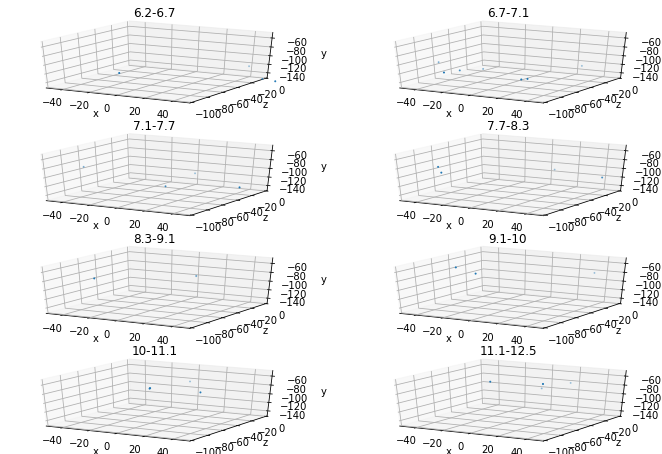

In [11]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND
#DEC between 17.5 and 18.5 AND
#parallax > 6.2 AND parallax <= 6.7

#6.2-6.7
data_frame = pd.read_csv("random6.2-6.7.csv")
a = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
a.loc[:, 'parallax_arcsec'] = a['parallax'].apply(lambda x: x*.001)
a.loc[:, 'R'] = a['parallax_arcsec'].apply(distance)
a.loc[:, 'x'] = a.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'y'] = a.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'z'] = a.apply(lambda r: z(r['R'], r['b']), axis=1)


#6.7-7.1
data_frame = pd.read_csv("random6.7-7.1.csv")
b = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
b.loc[:, 'parallax_arcsec'] = b['parallax'].apply(lambda x: x*.001)
b.loc[:, 'R'] = b['parallax_arcsec'].apply(distance)
b.loc[:, 'x'] = b.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'y'] = b.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'z'] = b.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.1-7.7
data_frame = pd.read_csv("random7.1-7.7.csv")
c = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
c.loc[:, 'parallax_arcsec'] = c['parallax'].apply(lambda x: x*.001)
c.loc[:, 'R'] = c['parallax_arcsec'].apply(distance)
c.loc[:, 'x'] = c.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'y'] = c.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'z'] = c.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.7-8.3
data_frame = pd.read_csv("random7.7-8.3.csv")
d = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
d.loc[:, 'parallax_arcsec'] = d['parallax'].apply(lambda x: x*.001)
d.loc[:, 'R'] = d['parallax_arcsec'].apply(distance)
d.loc[:, 'x'] = d.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'y'] = d.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'z'] = d.apply(lambda r: z(r['R'], r['b']), axis=1)


#8.3-9.1
data_frame = pd.read_csv("random8.3-9.1.csv")
e = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
e.loc[:, 'parallax_arcsec'] = e['parallax'].apply(lambda x: x*.001)
e.loc[:, 'R'] = e['parallax_arcsec'].apply(distance)
e.loc[:, 'x'] = e.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'y'] = e.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'z'] = e.apply(lambda r: z(r['R'], r['b']), axis=1)


#9.1-10
data_frame = pd.read_csv("random9.1-10.csv")
f = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
f.loc[:, 'parallax_arcsec'] = f['parallax'].apply(lambda x: x*.001)
f.loc[:, 'R'] = f['parallax_arcsec'].apply(distance)
f.loc[:, 'x'] = f.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'y'] = f.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'z'] = f.apply(lambda r: z(r['R'], r['b']), axis=1)


#10-11.1
data_frame = pd.read_csv("random10-11.1.csv")
g = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
g.loc[:, 'parallax_arcsec'] = g['parallax'].apply(lambda x: x*.001)
g.loc[:, 'R'] = g['parallax_arcsec'].apply(distance)
g.loc[:, 'x'] = g.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'y'] = g.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'z'] = g.apply(lambda r: z(r['R'], r['b']), axis=1)


#11.1-12.5
data_frame = pd.read_csv("random11.1-12.5.csv")
h = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
h.loc[:, 'parallax_arcsec'] = h['parallax'].apply(lambda x: x*.001)
h.loc[:, 'R'] = h['parallax_arcsec'].apply(distance)
h.loc[:, 'x'] = h.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'y'] = h.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'z'] = h.apply(lambda r: z(r['R'], r['b']), axis=1)


fig = plt.figure()
axa = fig.add_subplot(421, projection ='3d')
axa.scatter(a['x'], a['z'], a['y'],  s=1)
axa.set_xlim([-50, 50])
axa.set_ylim([-100, 0])
axa.set_zlim([-150, -50])
axa.set_xlabel('x')
axa.set_ylabel('z')
axa.set_zlabel('y')
axa.set_title('6.2-6.7')

axb = fig.add_subplot(422, projection ='3d')
axb.scatter(b['x'], b['z'], b['y'], s=1)
axb.set_xlim([-50, 50])
axb.set_ylim([-100, 0])
axb.set_zlim([-150, -50])
axb.set_xlabel('x')
axb.set_ylabel('z')
axb.set_zlabel('y')
axb.set_title('6.7-7.1')

axc = fig.add_subplot(423, projection ='3d')
axc.scatter(c['x'], c['z'], c['y'], s=1)
axc.set_xlim([-50, 50])
axc.set_ylim([-100, 0])
axc.set_zlim([-150, -50])
axc.set_xlabel('x')
axc.set_ylabel('z')
axc.set_zlabel('y')
axc.set_title('7.1-7.7')

axd = fig.add_subplot(424, projection ='3d')
axd.scatter(d['x'], d['z'], d['y'], s=1)
axd.set_xlim([-50, 50])
axd.set_ylim([-100, 0])
axd.set_zlim([-150, -50])
axd.set_xlabel('x')
axd.set_ylabel('z')
axd.set_zlabel('y')
axd.set_title('7.7-8.3')

axe = fig.add_subplot(425, projection ='3d')
axe.scatter(e['x'], e['z'], e['y'],  s=1)
axe.set_xlim([-50, 50])
axe.set_ylim([-100, 0])
axe.set_zlim([-150, -50])
axe.set_xlabel('x')
axe.set_ylabel('z')
axe.set_zlabel('y')
axe.set_title('8.3-9.1')

axf = fig.add_subplot(426, projection ='3d')
axf.scatter(f['x'], f['z'], f['y'], s=1)
axf.set_xlim([-50, 50])
axf.set_ylim([-100, 0])
axf.set_zlim([-150, -50])
axf.set_xlabel('x')
axf.set_ylabel('z')
axf.set_zlabel('y')
axf.set_title('9.1-10')

axg = fig.add_subplot(427, projection ='3d')
axg.scatter(g['x'], g['z'], g['y'], s=1)
axg.set_xlim([-50, 50])
axg.set_ylim([-100, 0])
axg.set_zlim([-150, -50])
axg.set_xlabel('x')
axg.set_ylabel('z')
axg.set_zlabel('y')
axg.set_title('10-11.1')

axh = fig.add_subplot(428, projection ='3d')
axh.scatter(h['x'], h['z'], h['y'], s=1)
axh.set_xlim([-50, 50])
axh.set_ylim([-100, 0])
axh.set_zlim([-150, -50])
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('11.1-12.5')

plt.subplots_adjust(1.5, 1.5, 3, 3)

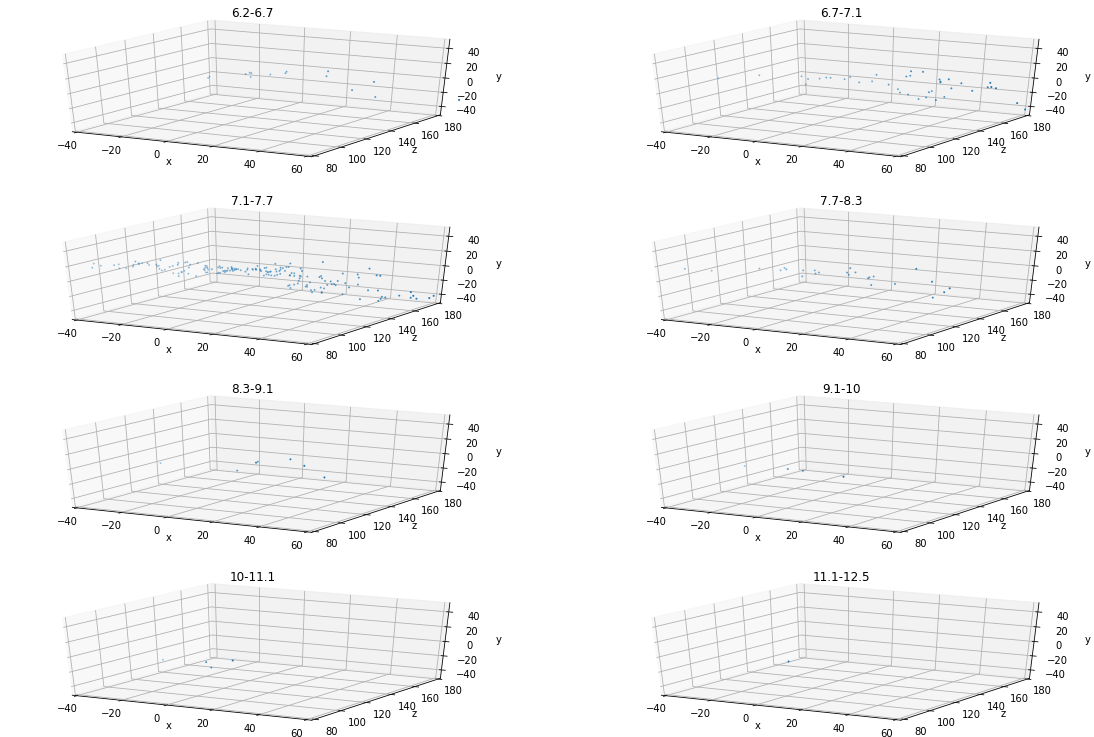

In [12]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND
#DEC between 23.65 and 24.65 AND
#parallax > 6.2 AND parallax <= 6.7

#6.2-6.7
data_frame = pd.read_csv("pleiades6.2-6.7.csv")
a = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
a.loc[:, 'parallax_arcsec'] = a['parallax'].apply(lambda x: x*.001)
a.loc[:, 'R'] = a['parallax_arcsec'].apply(distance)
a.loc[:, 'x'] = a.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'y'] = a.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'z'] = a.apply(lambda r: z(r['R'], r['b']), axis=1)


#6.7-7.1
data_frame = pd.read_csv("pleiades6.7-7.1.csv")
b = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
b.loc[:, 'parallax_arcsec'] = b['parallax'].apply(lambda x: x*.001)
b.loc[:, 'R'] = b['parallax_arcsec'].apply(distance)
b.loc[:, 'x'] = b.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'y'] = b.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'z'] = b.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.1-7.7
data_frame = pd.read_csv("pleiades7.1-7.7.csv")
c = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
c.loc[:, 'parallax_arcsec'] = c['parallax'].apply(lambda x: x*.001)
c.loc[:, 'R'] = c['parallax_arcsec'].apply(distance)
c.loc[:, 'x'] = c.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'y'] = c.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'z'] = c.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.7-8.3
data_frame = pd.read_csv("pleiades7.7-8.3.csv")
d = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
d.loc[:, 'parallax_arcsec'] = d['parallax'].apply(lambda x: x*.001)
d.loc[:, 'R'] = d['parallax_arcsec'].apply(distance)
d.loc[:, 'x'] = d.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'y'] = d.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'z'] = d.apply(lambda r: z(r['R'], r['b']), axis=1)


#8.3-9.1
data_frame = pd.read_csv("pleiades8.3-9.1.csv")
e = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
e.loc[:, 'parallax_arcsec'] = e['parallax'].apply(lambda x: x*.001)
e.loc[:, 'R'] = e['parallax_arcsec'].apply(distance)
e.loc[:, 'x'] = e.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'y'] = e.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'z'] = e.apply(lambda r: z(r['R'], r['b']), axis=1)


#9.1-10
data_frame = pd.read_csv("pleiades9.1-10.csv")
f = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
f.loc[:, 'parallax_arcsec'] = f['parallax'].apply(lambda x: x*.001)
f.loc[:, 'R'] = f['parallax_arcsec'].apply(distance)
f.loc[:, 'x'] = f.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'y'] = f.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'z'] = f.apply(lambda r: z(r['R'], r['b']), axis=1)


#10-11.1
data_frame = pd.read_csv("pleiades10-11.1.csv")
g = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
g.loc[:, 'parallax_arcsec'] = g['parallax'].apply(lambda x: x*.001)
g.loc[:, 'R'] = g['parallax_arcsec'].apply(distance)
g.loc[:, 'x'] = g.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'y'] = g.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'z'] = g.apply(lambda r: z(r['R'], r['b']), axis=1)


#11.1-12.5
data_frame = pd.read_csv("pleiades11.1-12.5.csv")
h = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
h.loc[:, 'parallax_arcsec'] = h['parallax'].apply(lambda x: x*.001)
h.loc[:, 'R'] = h['parallax_arcsec'].apply(distance)
h.loc[:, 'x'] = h.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'y'] = h.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'z'] = h.apply(lambda r: z(r['R'], r['b']), axis=1)


fig = plt.figure()
axa = fig.add_subplot(421, projection ='3d')
axa.scatter(a['x'], a['z'], a['y'],  s=1)
axa.set_xlim([-40, 60])
axa.set_ylim([80, 180])
axa.set_zlim([-50, 50])
axa.set_xlabel('x')
axa.set_ylabel('z')
axa.set_zlabel('y')
axa.set_title('6.2-6.7')

axb = fig.add_subplot(422, projection ='3d')
axb.scatter(b['x'], b['z'], b['y'], s=1)
axb.set_xlim([-40, 60])
axb.set_ylim([80, 180])
axb.set_zlim([-50, 50])
axb.set_xlabel('x')
axb.set_ylabel('z')
axb.set_zlabel('y')
axb.set_title('6.7-7.1')

axc = fig.add_subplot(423, projection ='3d')
axc.scatter(c['x'], c['z'], c['y'], s=1)
axc.set_xlim([-40, 60])
axc.set_ylim([80, 180])
axc.set_zlim([-50, 50])
axc.set_xlabel('x')
axc.set_ylabel('z')
axc.set_zlabel('y')
axc.set_title('7.1-7.7')

axd = fig.add_subplot(424, projection ='3d')
axd.scatter(d['x'], d['z'], d['y'], s=1)
axd.set_xlim([-40, 60])
axd.set_ylim([80, 180])
axd.set_zlim([-50, 50])
axd.set_xlabel('x')
axd.set_ylabel('z')
axd.set_zlabel('y')
axd.set_title('7.7-8.3')

axe = fig.add_subplot(425, projection ='3d')
axe.scatter(e['x'], e['z'], e['y'],  s=1)
axe.set_xlim([-40, 60])
axe.set_ylim([80, 180])
axe.set_zlim([-50, 50])
axe.set_xlabel('x')
axe.set_ylabel('z')
axe.set_zlabel('y')
axe.set_title('8.3-9.1')

axf = fig.add_subplot(426, projection ='3d')
axf.scatter(f['x'], f['z'], f['y'], s=1)
axf.set_xlim([-40, 60])
axf.set_ylim([80, 180])
axf.set_zlim([-50, 50])
axf.set_xlabel('x')
axf.set_ylabel('z')
axf.set_zlabel('y')
axf.set_title('9.1-10')

axg = fig.add_subplot(427, projection ='3d')
axg.scatter(g['x'], g['z'], g['y'], s=1)
axg.set_xlim([-40, 60])
axg.set_ylim([80, 180])
axg.set_zlim([-50, 50])
axg.set_xlabel('x')
axg.set_ylabel('z')
axg.set_zlabel('y')
axg.set_title('10-11.1')

axh = fig.add_subplot(428, projection ='3d')
axh.scatter(h['x'], h['z'], h['y'], s=1)
axh.set_xlim([-40, 60])
axh.set_ylim([80, 180])
axh.set_zlim([-50, 50])
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('11.1-12.5')

plt.subplots_adjust(1.5, 1.5, 4, 4)

### Below is the xy, xz, and yz graphs of Pleiades within 7.1 and 7.7 milliarcseconds
Essentially the viewpoint of a 3d graph before 3d graphing was possible.

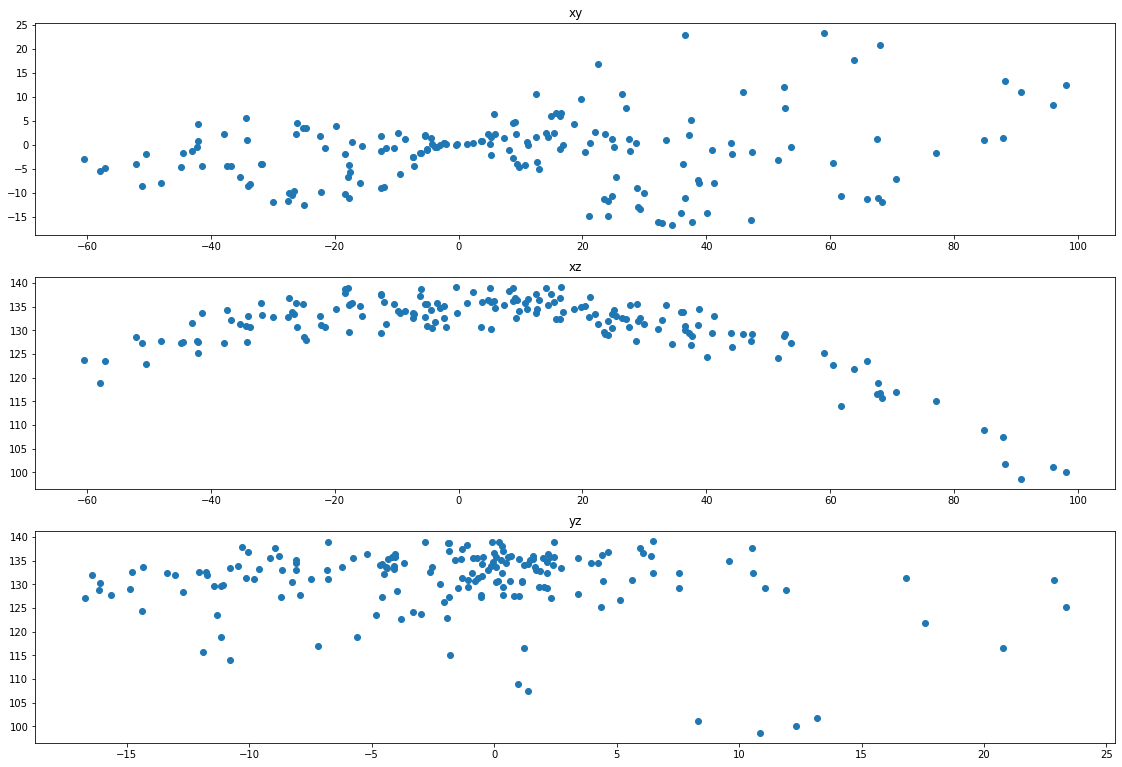

In [13]:
fig, axs = plt.subplots(3, 1)
axs[0].scatter(c['x'], c['y'])
axs[0].set_title('xy')
axs[1].scatter(c['x'], c['z'])
axs[1].set_title('xz')
axs[2].scatter(c['y'], c['z'])
axs[2].set_title('yz')
plt.subplots_adjust(1.5, 1.5, 4, 4)

### Below is the proper motion graph of the Pleiades

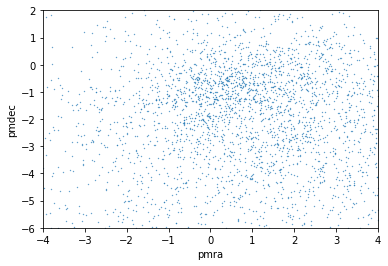

In [14]:
#Pleiades total
plt.scatter(pleiades['pmra'], pleiades['pmdec'], s=0.1)
plt.xlim(-4, 4)
plt.ylim(-6, 2)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.show()

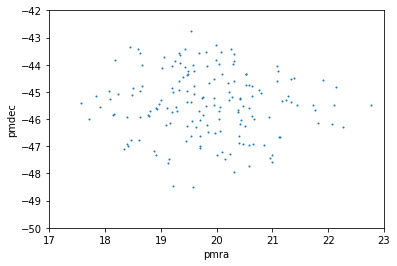

In [15]:
#Pleiades 7.1-7.7
plt.scatter(c['pmra'], c['pmdec'], s=1)
plt.xlim(17, 23)
plt.ylim(-50, -42)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.show()

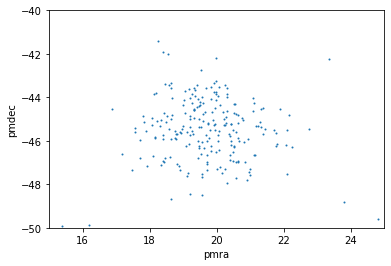

In [16]:
pleiades_half = pd.read_csv("pleiades6.2-12.5.csv")
plt.scatter(pleiades_half['pmra'], pleiades_half['pmdec'], s=1)
plt.xlim(15, 25)
plt.ylim(-50, -40)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.show()

### Below: HR Diagram
* Color
    - BP-RP
* Luminosity
    - (m-M) = 5log(d)-5

I decided to use the pleiades data from a parallax of 6.2 to 12.5 milliarcseconds because this would give me both stars on the cluster as well as a few off of it and I could see the differenc.

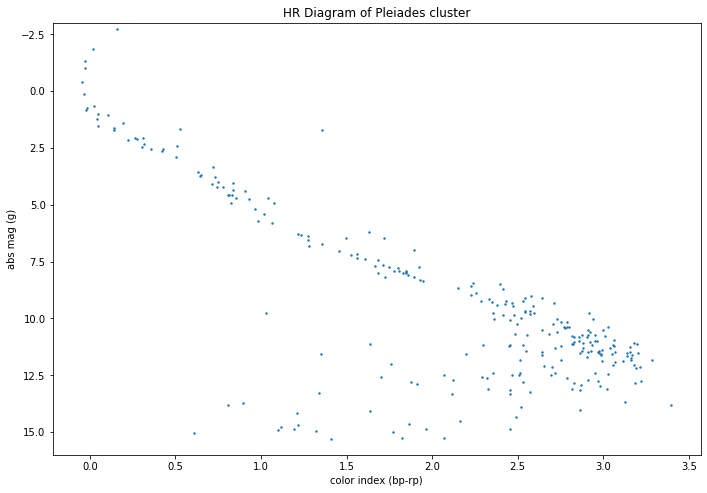

In [17]:
#color bp_rp
# x-axis pleiades_half['bp_rp']

#luminosity = absolute magnitude
def absmag(m, d):
    return (((math.log10(d) * 5)*-1)+5)+m

pleiades_half.loc[:, 'parallax_arcsec'] = pleiades_half['parallax'].apply(lambda x: x*.001)
pleiades_half.loc[:, 'R'] = pleiades_half['parallax_arcsec'].apply(distance)
pleiades_half.loc[:, 'luminosity'] = pleiades_half.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
#pleiades_half.head(10)
plt.scatter(pleiades_half['bp_rp'], pleiades_half['luminosity'], s=2)
plt.ylim(16, -3)
plt.xlabel("color index (bp-rp)")
plt.ylabel("abs mag (g)")
plt.title('HR Diagram of Pleiades cluster')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.show()

In [18]:
pleiades_half.head(10)

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,parallax_arcsec,R,luminosity
0,1635721458409799680,Gaia DR2 65222484301282048,65222484301282048,515081887,2015.5,56.426427,0.270290,24.069631,0.175261,7.672955,...,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007673,130.327882,13.339196
1,1635721458409799680,Gaia DR2 65222759179189248,65222759179189248,40690918,2015.5,56.397580,0.171527,24.083017,0.040217,7.503007,...,1.184652,1.291013,1.365090,1.324426,1.405755,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007503,133.279903,4.357839
2,1635721458409799680,Gaia DR2 65199222758514048,65199222758514048,56486743,2015.5,56.666838,0.082008,23.782747,0.055540,7.267479,...,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007267,137.599294,10.422443
3,1635721458409799680,Gaia DR2 65216643145862144,65216643145862144,750192779,2015.5,56.517996,0.074405,23.927848,0.062037,7.091920,...,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007092,141.005532,10.000360
4,1635721458409799680,Gaia DR2 65204342359530112,65204342359530112,1444521724,2015.5,56.559782,0.187109,23.850619,0.127175,7.283831,...,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007284,137.290389,12.415345
5,1635721458409799680,Gaia DR2 65199978672758272,65199978672758272,1026102614,2015.5,56.657094,0.045751,23.787516,0.027375,7.399871,...,1.237568,1.312197,1.337733,1.325058,1.350409,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007400,135.137488,4.384155
6,1635721458409799680,Gaia DR2 65210389673469312,65210389673469312,559983337,2015.5,56.732490,0.110130,23.939878,0.078110,7.080585,...,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007081,141.231268,10.791993
7,1635721458409799680,Gaia DR2 65190838982357760,65190838982357760,221056300,2015.5,56.412163,0.189572,23.815393,0.123166,7.525286,...,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007525,132.885323,12.474406
8,1635721458409799680,Gaia DR2 65190220507070208,65190220507070208,1451733334,2015.5,56.373316,0.037642,23.760309,0.021717,7.258553,...,0.585119,0.692350,0.137345,0.136189,0.138502,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007259,137.768505,7.170271
9,1635721458409799680,Gaia DR2 65178568258674176,65178568258674176,1030786486,2015.5,56.414281,0.202279,23.754102,0.146423,7.346931,...,0.958143,1.081966,0.327849,0.316560,0.339138,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007347,136.111255,6.219912
